# NATALIDAD SONORA
Base de datos del INEGI filtrada por el estado de Sonora.

### Se cargan librerias y archivos con datos de natalidad

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [80]:
dataPath = '../data/raw/INEGI_SONORA_FILTRO/'
fileExits = os.path.exists(dataPath+'298_natalidad_26_xlsx/natalidad_26.xlsx')

if fileExits: 
    dfNatalidad = pd.read_excel(dataPath+'298_natalidad_26_xlsx/natalidad_26.xlsx', sheet_name='valor')
    dfIndices = pd.read_excel(dataPath+'298_natalidad_26_xlsx/natalidad_26.xlsx', sheet_name='notas_por_valor',usecols='A,B')




In [81]:
dfNatalidad.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1990,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,unidad_medida
0,26,Sonora,0,Estatal,1002000013,Promedio de hijos nacidos vivos de las mujeres...,NaN,NaN,ND,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Promedio
1,26,Sonora,0,Estatal,1002000026,Nacimientos,NaN,56545.0,55786,56280.0,...,53768.0,52825.0,51894.0,48925,46785.0,45951.0,43729.0,44229.0,30904.0,Nacimientos
2,26,Sonora,0,Estatal,1002000027,Nacimientos hombres,NaN,28856.0,28602,28871.0,...,27453.0,26878.0,26506.0,24942,23703.0,23402.0,22282.0,22477.0,15899.0,Nacimientos
3,26,Sonora,0,Estatal,1002000028,Nacimientos mujeres,NaN,27664.0,27155,27393.0,...,26315.0,25947.0,25388.0,23983,23081.0,22549.0,21447.0,21752.0,15005.0,Nacimientos
4,26,Sonora,0,Estatal,1002000029,Nacimientos de sexo no especificado,NaN,25.0,29,16.0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,Nacimientos


In [82]:
dfNatalidad.shape

(966, 35)

## Remover columnas

In [83]:
dfNatalidad.drop(['cve_entidad','desc_entidad'],
  axis='columns', inplace=True)

In [84]:
dfNatalidad.head()

,cve_municipio,desc_municipio,id_indicador,indicador,1990,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,unidad_medida
0,0,Estatal,1002000013,Promedio de hijos nacidos vivos de las mujeres...,NaN,NaN,ND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Promedio
1,0,Estatal,1002000026,Nacimientos,NaN,56545.0,55786,56280.0,55840.0,56322.0,...,53768.0,52825.0,51894.0,48925,46785.0,45951.0,43729.0,44229.0,30904.0,Nacimientos
2,0,Estatal,1002000027,Nacimientos hombres,NaN,28856.0,28602,28871.0,28533.0,29044.0,...,27453.0,26878.0,26506.0,24942,23703.0,23402.0,22282.0,22477.0,15899.0,Nacimientos
3,0,Estatal,1002000028,Nacimientos mujeres,NaN,27664.0,27155,27393.0,27303.0,27233.0,...,26315.0,25947.0,25388.0,23983,23081.0,22549.0,21447.0,21752.0,15005.0,Nacimientos
4,0,Estatal,1002000029,Nacimientos de sexo no especificado,NaN,25.0,29,16.0,4.0,45.0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,Nacimientos


In [85]:
indicesNatalidad = dfNatalidad[['id_indicador','indicador']].drop_duplicates(subset = ["id_indicador"])

In [86]:
indicesNatalidadCatalogo =indicesNatalidad[:4]
print(indicesNatalidadCatalogo.to_string())

   id_indicador                                                        indicador
0    1002000013  Promedio de hijos nacidos vivos de las mujeres de 12 años y más
1    1002000026                                                      Nacimientos
2    1002000027                                              Nacimientos hombres
3    1002000028                                              Nacimientos mujeres


In [87]:
zonaNatalidadCatalogo = dfNatalidad[['cve_municipio','desc_municipio']].drop_duplicates(subset = ["cve_municipio"]).reset_index(drop=True)

In [88]:
print(zonaNatalidadCatalogo.to_string())

    cve_municipio                 desc_municipio
0               0                        Estatal
1               1                        Aconchi
2               2                    Agua Prieta
3               3                         Alamos
4               4                          Altar
5               5                       Arivechi
6               6                         Arizpe
7               7                           Atil
8               8                   Bacadéhuachi
9               9                       Bacanora
10             10                        Bacerac
11             11                       Bacoachi
12             12                          Bácum
13             13                      Banámichi
14             14                      Baviácora
15             15                        Bavispe
16             16                  Benjamín Hill
17             17                        Caborca
18             18                         Cajeme
19             19   

In [89]:
zonaNatalidadCatalogo.shape

(74, 2)

Verificacion de vacios

In [90]:
dfNatalidad.isna().sum()

cve_municipio       0
desc_municipio      0
id_indicador        0
indicador           0
1990              960
1994              668
1995              597
1996              668
1997              668
1998              668
1999              668
2000              587
2001              668
2002              668
2003              668
2004              668
2005              595
2006              668
2007              668
2008              668
2009              668
2010              587
2011              668
2012              668
2013              668
2014              668
2015              591
2016              668
2017              668
2018              668
2019              668
2020              157
unidad_medida       0
dtype: int64

Ver tipo de variables

In [91]:
print(dfNatalidad.dtypes.to_string())

cve_municipio       int64
desc_municipio     object
id_indicador        int64
indicador          object
1990              float64
1994              float64
1995               object
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015               object
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
unidad_medida      object


In [92]:
print(dfNatalidad.info(verbose=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cve_municipio   966 non-null    int64  
 1   desc_municipio  966 non-null    object 
 2   id_indicador    966 non-null    int64  
 3   indicador       966 non-null    object 
 4   1990            6 non-null      float64
 5   1994            298 non-null    float64
 6   1995            369 non-null    object 
 7   1996            298 non-null    float64
 8   1997            298 non-null    float64
 9   1998            298 non-null    float64
 10  1999            298 non-null    float64
 11  2000            379 non-null    float64
 12  2001            298 non-null    float64
 13  2002            298 non-null    float64
 14  2003            298 non-null    float64
 15  2004            298 non-null    float64
 16  2005            371 non-null    float64
 17  2006            298 non-null    flo

Modificar e Imputar valores

In [93]:
dfNatalidad['1995'] = dfNatalidad['1995'].replace(['ND'],'Nan')
dfNatalidad['2015'] = dfNatalidad['2015'].replace(['MI'],'Nan')

Modificacion de tipos de variables

In [94]:
dfNatalidad['cve_municipio'] = dfNatalidad['cve_municipio'].astype('category')
dfNatalidad['id_indicador'] = dfNatalidad['id_indicador'].astype('category')
dfNatalidad['indicador'] = dfNatalidad['indicador'].astype('category')
dfNatalidad['desc_municipio'] = dfNatalidad['desc_municipio'].astype('category')
dfNatalidad['unidad_medida'] = dfNatalidad['unidad_medida'].astype('category')
dfNatalidad['1995'] = dfNatalidad['1995'].astype('float64')
dfNatalidad['2015'] = dfNatalidad['2015'].astype('float64')

In [95]:
print(dfNatalidad.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cve_municipio   966 non-null    category
 1   desc_municipio  966 non-null    category
 2   id_indicador    966 non-null    category
 3   indicador       966 non-null    category
 4   1990            6 non-null      float64 
 5   1994            298 non-null    float64 
 6   1995            298 non-null    float64 
 7   1996            298 non-null    float64 
 8   1997            298 non-null    float64 
 9   1998            298 non-null    float64 
 10  1999            298 non-null    float64 
 11  2000            379 non-null    float64 
 12  2001            298 non-null    float64 
 13  2002            298 non-null    float64 
 14  2003            298 non-null    float64 
 15  2004            298 non-null    float64 
 16  2005            371 non-null    float64 
 17  2006            

In [96]:
natalidad_sonora_municipio_nacimientos_mayorIgual12_todo = dfNatalidad[dfNatalidad['id_indicador'] == 1002000026]
natalidad_sonora_municipio_nacimientos_mayorIgual12 = natalidad_sonora_municipio_nacimientos_mayorIgual12_todo[natalidad_sonora_municipio_nacimientos_mayorIgual12_todo['cve_municipio'] != 0]

In [97]:
natalidad_sonora_municipio_nacimientos_mayorIgual12

,cve_municipio,desc_municipio,id_indicador,indicador,1990,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,unidad_medida
27,1,Aconchi,1002000026,Nacimientos,NaN,68.0,59.0,75.0,63.0,66.0,...,46.0,37.0,33.0,40.0,43.0,26.0,38.0,34.0,29.0,Nacimientos
40,2,Agua Prieta,1002000026,Nacimientos,NaN,1589.0,1665.0,1721.0,1723.0,1801.0,...,1886.0,1769.0,1575.0,1473.0,1400.0,1466.0,1477.0,1492.0,955.0,Nacimientos
53,3,Alamos,1002000026,Nacimientos,NaN,674.0,575.0,732.0,579.0,615.0,...,527.0,544.0,473.0,443.0,428.0,391.0,344.0,354.0,291.0,Nacimientos
66,4,Altar,1002000026,Nacimientos,NaN,151.0,176.0,172.0,198.0,208.0,...,227.0,233.0,213.0,181.0,165.0,190.0,169.0,171.0,115.0,Nacimientos
79,5,Arivechi,1002000026,Nacimientos,NaN,82.0,30.0,23.0,46.0,35.0,...,22.0,17.0,17.0,14.0,19.0,13.0,18.0,16.0,6.0,Nacimientos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,69,Yécora,1002000026,Nacimientos,NaN,172.0,151.0,324.0,156.0,117.0,...,121.0,127.0,130.0,110.0,98.0,85.0,86.0,75.0,61.0,Nacimientos
924,70,General Plutarco Elías Calles,1002000026,Nacimientos,NaN,340.0,329.0,300.0,410.0,328.0,...,416.0,323.0,358.0,328.0,291.0,243.0,246.0,206.0,115.0,Nacimientos
937,71,Benito Juárez,1002000026,Nacimientos,NaN,0.0,0.0,0.0,0.0,559.0,...,490.0,488.0,474.0,461.0,392.0,409.0,365.0,394.0,291.0,Nacimientos
950,72,San Ignacio Río Muerto,1002000026,Nacimientos,NaN,0.0,0.0,0.0,0.0,329.0,...,307.0,299.0,273.0,283.0,250.0,266.0,268.0,231.0,212.0,Nacimientos


In [98]:
natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy = natalidad_sonora_municipio_nacimientos_mayorIgual12.drop(['id_indicador', 'indicador','unidad_medida'], axis=1).reset_index(drop=True)
natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy

,cve_municipio,desc_municipio,1990,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Aconchi,NaN,68.0,59.0,75.0,63.0,66.0,86.0,77.0,...,46.0,46.0,37.0,33.0,40.0,43.0,26.0,38.0,34.0,29.0
1,2,Agua Prieta,NaN,1589.0,1665.0,1721.0,1723.0,1801.0,1900.0,1860.0,...,1709.0,1886.0,1769.0,1575.0,1473.0,1400.0,1466.0,1477.0,1492.0,955.0
2,3,Alamos,NaN,674.0,575.0,732.0,579.0,615.0,698.0,633.0,...,613.0,527.0,544.0,473.0,443.0,428.0,391.0,344.0,354.0,291.0
3,4,Altar,NaN,151.0,176.0,172.0,198.0,208.0,212.0,238.0,...,208.0,227.0,233.0,213.0,181.0,165.0,190.0,169.0,171.0,115.0
4,5,Arivechi,NaN,82.0,30.0,23.0,46.0,35.0,22.0,34.0,...,15.0,22.0,17.0,17.0,14.0,19.0,13.0,18.0,16.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,Yécora,NaN,172.0,151.0,324.0,156.0,117.0,127.0,116.0,...,133.0,121.0,127.0,130.0,110.0,98.0,85.0,86.0,75.0,61.0
69,70,General Plutarco Elías Calles,NaN,340.0,329.0,300.0,410.0,328.0,332.0,331.0,...,400.0,416.0,323.0,358.0,328.0,291.0,243.0,246.0,206.0,115.0
70,71,Benito Juárez,NaN,0.0,0.0,0.0,0.0,559.0,604.0,570.0,...,488.0,490.0,488.0,474.0,461.0,392.0,409.0,365.0,394.0,291.0
71,72,San Ignacio Río Muerto,NaN,0.0,0.0,0.0,0.0,329.0,412.0,338.0,...,247.0,307.0,299.0,273.0,283.0,250.0,266.0,268.0,231.0,212.0


Grabado Tidy natalidad_son_tidy.csv

In [99]:
path = '../data/processed/'
path_natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy ='natalidad_sonora_municipio_tidy_nacimientos_mayorIgual12_tidy.csv'

natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy.to_csv(path+path_natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy, index = False)

# EDA

In [100]:
print(natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy.describe)

<bound method NDFrame.describe of    cve_municipio                 desc_municipio  1990    1994    1995    1996  \
0              1                        Aconchi   NaN    68.0    59.0    75.0   
1              2                    Agua Prieta   NaN  1589.0  1665.0  1721.0   
2              3                         Alamos   NaN   674.0   575.0   732.0   
3              4                          Altar   NaN   151.0   176.0   172.0   
4              5                       Arivechi   NaN    82.0    30.0    23.0   
..           ...                            ...   ...     ...     ...     ...   
68            69                         Yécora   NaN   172.0   151.0   324.0   
69            70  General Plutarco Elías Calles   NaN   340.0   329.0   300.0   
70            71                  Benito Juárez   NaN     0.0     0.0     0.0   
71            72         San Ignacio Río Muerto   NaN     0.0     0.0     0.0   
72           996                No especificado   NaN    35.0     4.0     8

In [101]:
reshaped_df = pd.DataFrame(natalidad_sonora_municipio_nacimientos_mayorIgual12_tidy.melt(['cve_municipio','desc_municipio']))

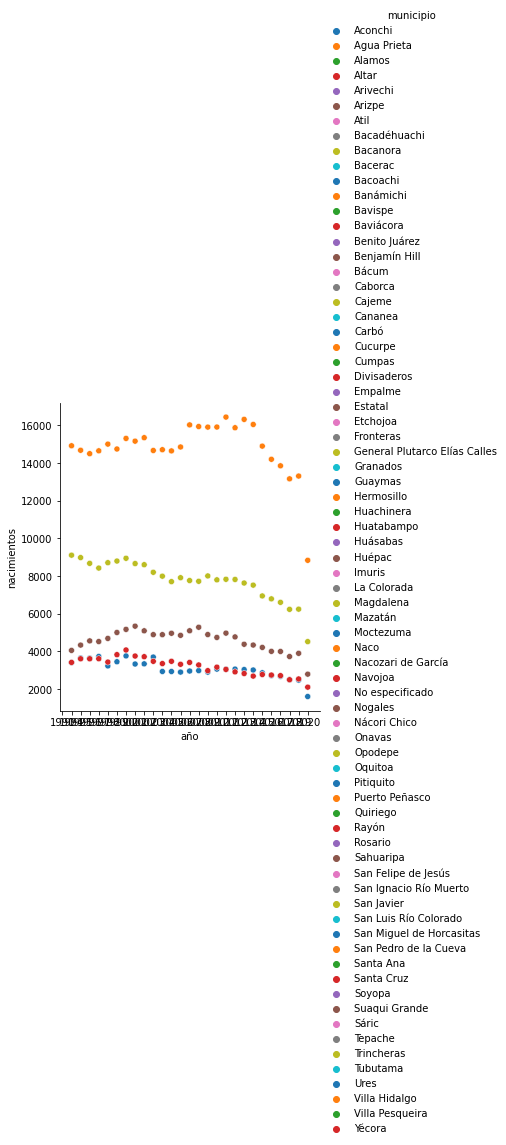

In [102]:

mun=('Navojoa','Hermosillo','Cajeme','Nogales','Guaymas')
col_new= {'desc_municipio':'municipio', 'variable':'año','value':'nacimientos'}
reshaped_dfMunFiltro = pd.DataFrame(reshaped_df[reshaped_df['desc_municipio'].isin(mun)]).reset_index()
reshaped_dfMunFiltro.rename(columns = col_new, inplace = True)

sns.relplot(data=reshaped_dfMunFiltro, y="nacimientos", x="año", hue='municipio',palette="tab10")